#### Data Source : https://www.kaggle.com/lava18/google-play-store-apps#googleplaystore_user_reviews.csv

In [308]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [410]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import metrics

# Importing Datasets

In [161]:
playstore_df = pd.read_csv('googleplaystore.csv')

playstore_user_reviews_df = pd.read_csv('googleplaystore_user_reviews.csv')

In [484]:
# Investigate the size of dataset

In [162]:
playstore_df.shape

(10840, 13)

In [485]:
# Taking a glimpse of the dataset

In [163]:
playstore_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,"""i DT"" Fútbol. Todos Somos Técnicos.",SPORTS,nan,27,3.6M,500+,Free,0.000,Everyone,Sports,07-Oct-17,0.22,4.1 and up
1,.R,TOOLS,4.500,259,203k,"10,000+",Free,0.000,Everyone,Tools,16-Sep-14,1.1.06,1.5 and up
2,/u/app,COMMUNICATION,4.700,573,53M,"10,000+",Free,0.000,Mature 17+,Communication,03-Jul-18,4.2.4,4.1 and up
3,[adult swim],FAMILY,3.600,21433,21M,"1,000,000+",Free,0.000,Mature 17+,Entertainment,29-May-18,3.0.1805181047,5.0 and up
4,[BN] Blitz,SPORTS,3.200,4,5.6M,100+,Free,0.000,Everyone,Sports,17-May-18,4.6,4.3 and up


In [165]:
playstore_user_reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000,0.533
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250,0.288
2,10 Best Foods for You,NaN,NaN,nan,nan
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400,0.875
4,10 Best Foods for You,Best idea us,Positive,1.000,0.300


In [486]:
# Removing duplicate values from both the datasets

In [166]:
playstore_user_reviews_df_1 = playstore_user_reviews_df.drop_duplicates()

In [167]:
playstore_df_1 = playstore_df.drop_duplicates()

In [487]:
# Reinvestigate the size of dataset

In [168]:
playstore_user_reviews_df_1.shape

(30679, 5)

In [169]:
playstore_user_reviews_df.shape

(64295, 5)

In [170]:
playstore_df_1.shape

(10357, 13)

In [171]:
playstore_df.shape

(10840, 13)

In [488]:
# Filter for required columns from the reviews data

In [174]:
playstore_user_reviews_df_2 = playstore_user_reviews_df_1[ ['App', 'Sentiment_Polarity'] ]

In [489]:
# Remove missing values and investigate shape

In [175]:
playstore_user_reviews_df_3 = playstore_user_reviews_df_2.dropna()

In [176]:
playstore_user_reviews_df_3.shape

(29697, 2)

In [491]:
# Calculating the average sentiment polarity. This metric will decide if the app has a positive sentiment or not

The logic used is if the avg. sentiment is greater than 0, we will consider the review to be positive else we will consider it to be negative sentiment

In [178]:
playstore_user_reviews_df_4 = playstore_user_reviews_df_3.groupby('App').agg({'Sentiment_Polarity' : 'mean'})

In [183]:
playstore_df_2 = playstore_df_1.drop_duplicates(subset='App', keep="last")

In [493]:
# Now  join the two datasets to get the sentiment values and app details together

In [186]:
merge_playstore = pd.merge(playstore_df_2, playstore_user_reviews_df_4, on = 'App', how = 'inner')

In [494]:
# Convert the scientific notations to decimals

In [187]:
pd.set_option('display.float_format', lambda x: '%.3f' % x) #to convert scientific notations to decimals

In [188]:
merge_playstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Sentiment_Polarity
0,10 Best Foods for You,HEALTH_AND_FITNESS,4.000,2490,3.8M,"500,000+",Free,0.000,Everyone 10+,Health & Fitness,17-Feb-17,1.9,2.3.3 and up,0.466
1,11st,SHOPPING,3.800,48732,20M,"10,000,000+",Free,0.000,Everyone,Shopping,31-Jul-18,7.8.1,4.0 and up,0.181
2,1800 Contacts - Lens Store,MEDICAL,4.700,23160,26M,"1,000,000+",Free,0.000,Everyone,Medical,27-Jul-18,7.4.1,5.0 and up,0.318
3,1LINE – One Line with One Touch,GAME,4.600,214878,10M,"10,000,000+",Free,0.000,Everyone,Board,03-Aug-18,2.0.4,4.1 and up,0.196
4,2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif,PERSONALIZATION,4.200,115773,Varies with device,"10,000,000+",Free,0.000,Everyone,Personalization,22-May-18,Varies with device,4.1 and up,0.424


In [495]:
# Analyze the summary details of the dataset

In [157]:
playstore_df_3 = playstore_df_2.groupby('Category').agg({'Category' : 'count',
                                                         'Rating' : 'mean'})
playstore_df_3

,Category,Rating
Category,,
1.9,1,19.000
ART_AND_DESIGN,61,4.359
AUTO_AND_VEHICLES,85,4.190
BEAUTY,53,4.279
BOOKS_AND_REFERENCE,222,4.345
BUSINESS,419,4.097
COMICS,56,4.181
COMMUNICATION,316,4.121
DATING,170,3.980


# Visualizing the dataset

In [497]:
# Convert `reviews` and `price` to numeric

In [189]:
merge_playstore[["Price", "Reviews"]] = merge_playstore[["Price", "Reviews"]].apply(pd.to_numeric)

# Rating vs Category

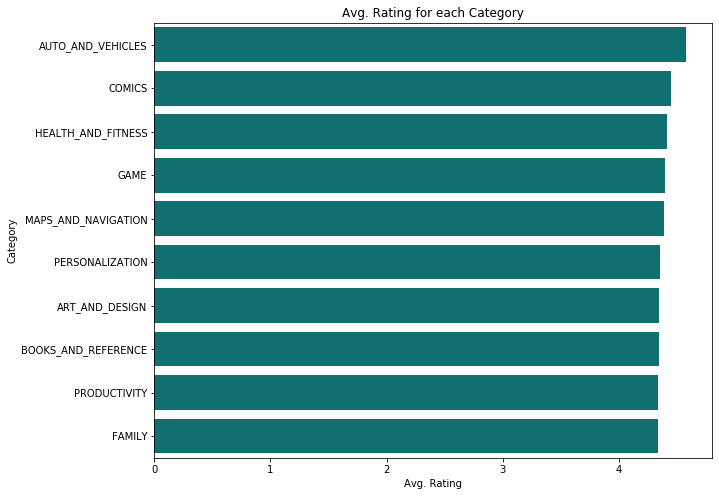

In [235]:
g=merge_playstore.groupby("Category",as_index=False).mean()[['Category','Rating']].sort_values('Rating',ascending=0).head(10)
plt.figure(figsize=(10,8))

sns.barplot(x='Rating',y='Category',data=g,color="teal")
plt.title("Avg. Rating for top 10  Category")
plt.xlabel('Avg. Rating')
plt.ylabel('Category');

# App Count vs Category

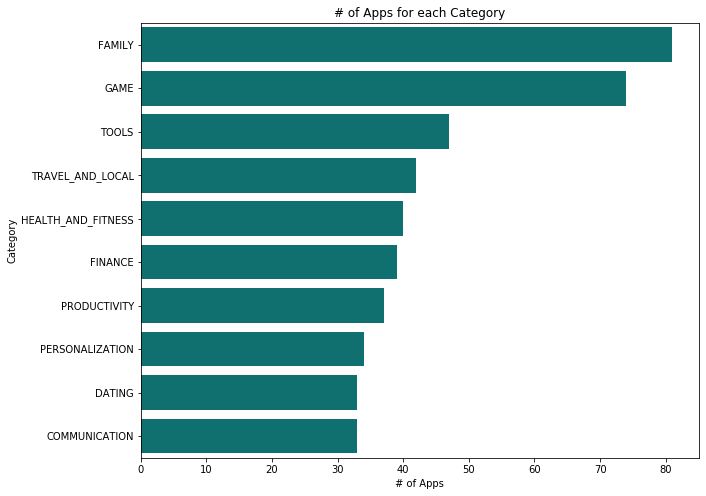

In [236]:
g=merge_playstore.groupby("Category",as_index=False).count()[['Category','App']].sort_values('App',ascending=0).head(10)
plt.figure(figsize=(10,8))

sns.barplot(x='App',y='Category',data=g,color="teal")
plt.title("# of Apps for top 10 Category")
plt.xlabel('# of Apps')
plt.ylabel('Category');

# Price vs Category

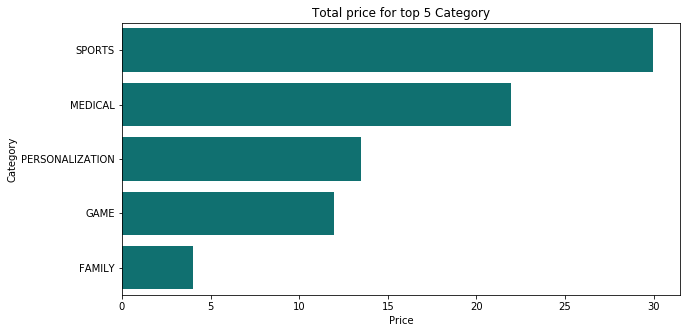

In [237]:
g=merge_playstore.groupby("Category",as_index=False).sum()[['Category','Price']].sort_values('Price',ascending=0).head()
plt.figure(figsize=(10,5))

sns.barplot(x='Price',y='Category',data=g,color="teal")
plt.title("Total price for top 5 Category")
plt.xlabel('Price')
plt.ylabel('Category');



# Reviews vs Category

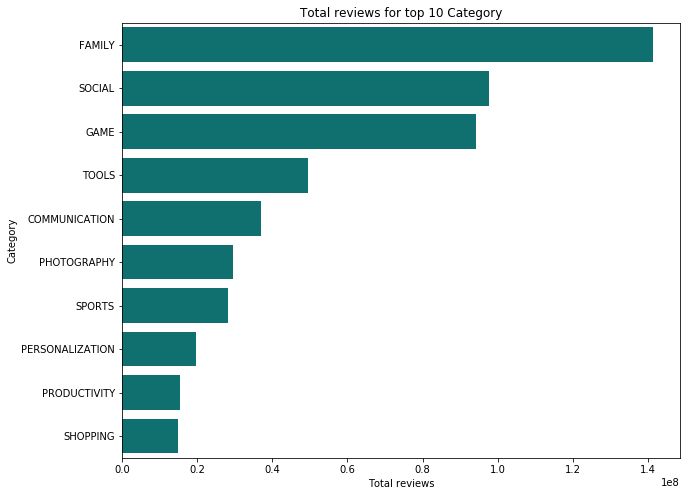

In [238]:
g=merge_playstore.groupby("Category",as_index=False).sum()[['Category','Reviews']].sort_values('Reviews',ascending=0).head(10)
plt.figure(figsize=(10,8))

sns.barplot(x='Reviews',y='Category',data=g,color="teal")
plt.title("Total reviews for top 10 Category")
plt.xlabel('Total reviews')
plt.ylabel('Category');

# Reviews vs Genres

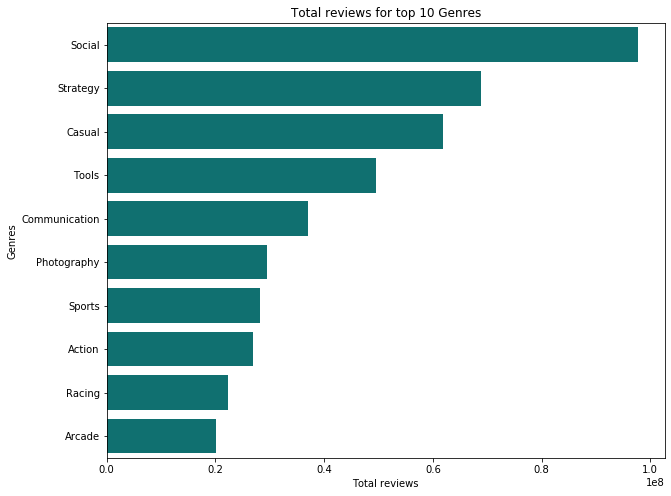

In [239]:
g=merge_playstore.groupby("Genres",as_index=False).sum()[['Genres','Reviews']].sort_values('Reviews',ascending=0).head(10)
plt.figure(figsize=(10,8))

sns.barplot(x='Reviews',y='Genres',data=g,color="teal")
plt.title("Total reviews for top 10 Genres")
plt.xlabel('Total reviews')
plt.ylabel('Genres');

# App count vs Genres

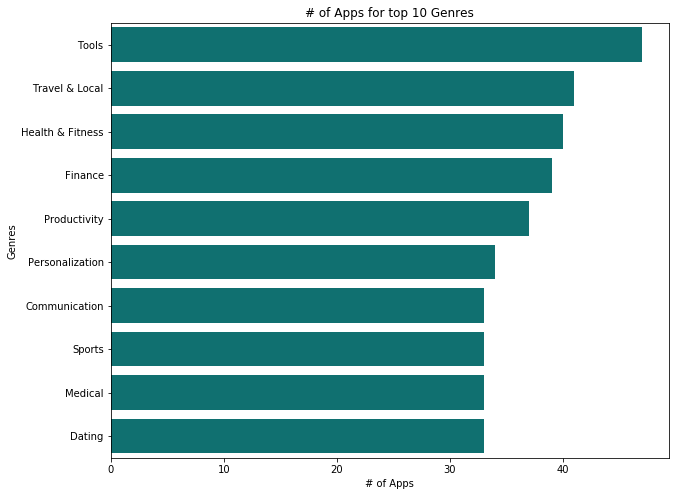

In [240]:
g=merge_playstore.groupby("Genres",as_index=False).count()[['Genres','App']].sort_values('App',ascending=0).head(10)
plt.figure(figsize=(10,8))

sns.barplot(x='App',y='Genres',data=g,color="teal")
plt.title("# of Apps for top 10 Genres")
plt.xlabel('# of Apps')
plt.ylabel('Genres');

# Modelling

In [476]:
def series_func(row):
    val = (row['Sentiment_Polarity'])
    if val > 0:
        Sentiment_Classifier = 1
    else:
        Sentiment_Classifier = 0
    return Sentiment_Classifier

merge_playstore['Sentiment_Classifier']=merge_playstore.apply(series_func,axis=1)

# Model 1 : Using variables `Reviews`

In [477]:
merge_playstore1=merge_playstore.dropna(axis=0, how='any')

**Step1:** Define assymetric cost for misclassification<br />
**Step2:** Then split the data into test and validation<br />
**Step3:** Build the model and assess the performance

In [478]:
logreg = LogisticRegression(class_weight={0:3,1:1})

In [479]:
X=merge_playstore1[['Reviews']]
y=merge_playstore1['Sentiment_Classifier']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=123)

In [480]:
logreg.fit(Xtrain,ytrain)
y_pred=logreg.predict(Xtest)
cnf_matrix = metrics.confusion_matrix(ytest, y_pred)
cnf_matrix

C:\Users\kaustubh_14\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[  1,  24],
       [  6, 173]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

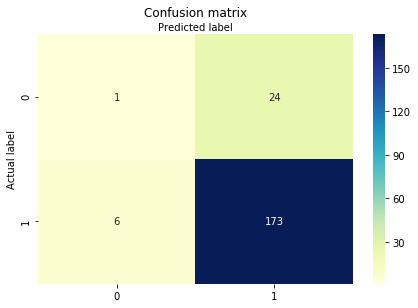

In [481]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [482]:
print("Accuracy:",metrics.accuracy_score(ytest, y_pred))
print("Precision:",metrics.precision_score(ytest, y_pred))
print("Recall:",metrics.recall_score(ytest, y_pred))
print("MR:",(ytest!=y_score).mean())

Accuracy: 0.8529411764705882
Precision: 0.8781725888324873
Recall: 0.9664804469273743
MR: 0.12254901960784313


# Model 2 : Using variables `type`, `Category` and `Reviews`

In [469]:
merge_playstore1=merge_playstore.dropna(axis=0, how='any')

In [470]:
logreg = LogisticRegression(class_weight={0:3,1:1})

In [471]:
merge_playstore1=merge_playstore.dropna(axis=0, how='any')
cat_vars=['Type','Category']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(merge_playstore1[var], prefix=var)
    merge_playstore2=merge_playstore1.join(cat_list)
    merge_playstore1=merge_playstore2
cat_vars=['Type','Category']
data_vars=merge_playstore1.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

data_final=merge_playstore1[to_keep]
data_final.columns.values

array(['App', 'Rating', 'Reviews', 'Size', 'Installs', 'Price',
       'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Sentiment_Polarity', 'Sentiment_Classifier',
       'Type_Free', 'Type_Paid', 'Category_ART_AND_DESIGN',
       'Category_AUTO_AND_VEHICLES', 'Category_BEAUTY',
       'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS',
       'Category_COMICS', 'Category_COMMUNICATION', 'Category_DATING',
       'Category_EDUCATION', 'Category_ENTERTAINMENT', 'Category_EVENTS',
       'Category_FAMILY', 'Category_FINANCE', 'Category_FOOD_AND_DRINK',
       'Category_GAME', 'Category_HEALTH_AND_FITNESS',
       'Category_HOUSE_AND_HOME', 'Category_LIBRARIES_AND_DEMO',
       'Category_LIFESTYLE', 'Category_MAPS_AND_NAVIGATION',
       'Category_MEDICAL', 'Category_NEWS_AND_MAGAZINES',
       'Category_PARENTING', 'Category_PERSONALIZATION',
       'Category_PHOTOGRAPHY', 'Category_PRODUCTIVITY',
       'Category_SHOPPING', 'Category_SOCIAL', 'Category

In [472]:
X=merge_playstore1[['Reviews','Type_Free', 'Type_Paid', 'Category_ART_AND_DESIGN',
       'Category_AUTO_AND_VEHICLES', 'Category_BEAUTY',
       'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS',
       'Category_COMICS', 'Category_COMMUNICATION', 'Category_DATING',
       'Category_EDUCATION', 'Category_ENTERTAINMENT', 'Category_EVENTS',
       'Category_FAMILY', 'Category_FINANCE', 'Category_FOOD_AND_DRINK',
       'Category_GAME', 'Category_HEALTH_AND_FITNESS',
       'Category_HOUSE_AND_HOME', 'Category_LIBRARIES_AND_DEMO',
       'Category_LIFESTYLE', 'Category_MAPS_AND_NAVIGATION',
       'Category_MEDICAL', 'Category_NEWS_AND_MAGAZINES',
       'Category_PARENTING', 'Category_PERSONALIZATION',
       'Category_PHOTOGRAPHY', 'Category_PRODUCTIVITY',
       'Category_SHOPPING', 'Category_SOCIAL', 'Category_SPORTS',
       'Category_TOOLS', 'Category_TRAVEL_AND_LOCAL',
       'Category_VIDEO_PLAYERS', 'Category_WEATHER']]
y=merge_playstore1['Sentiment_Classifier']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=123)

In [473]:
logreg.fit(Xtrain,ytrain)
y_pred=logreg.predict(Xtest)
cnf_matrix = metrics.confusion_matrix(ytest, y_pred)
cnf_matrix

C:\Users\kaustubh_14\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[  0,  25],
       [  2, 177]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

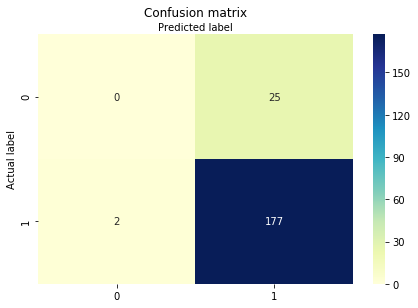

In [474]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [475]:
print("Accuracy:",metrics.accuracy_score(ytest, y_pred))
print("Precision:",metrics.precision_score(ytest, y_pred))
print("Recall:",metrics.recall_score(ytest, y_pred))
print("MR:",(ytest!=y_score).mean())

Accuracy: 0.8676470588235294
Precision: 0.8762376237623762
Recall: 0.9888268156424581
MR: 0.12254901960784313


# Model 3 : Using variables `type`, `Genres` and `Reviews`

In [ ]:
merge_playstore1=merge_playstore.dropna(axis=0, how='any')

In [463]:
logreg = LogisticRegression(class_weight={0:3,1:1})

In [464]:
merge_playstore1=merge_playstore.dropna(axis=0, how='any')
cat_vars=['Type','Genres']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(merge_playstore1[var], prefix=var)
    merge_playstore2=merge_playstore1.join(cat_list)
    merge_playstore1=merge_playstore2
cat_vars=['Type','Genres']
data_vars=merge_playstore1.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

data_final=merge_playstore1[to_keep]
data_final.columns.values

array(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs',
       'Price', 'Content Rating', 'Last Updated', 'Current Ver',
       'Android Ver', 'Sentiment_Polarity', 'Sentiment_Classifier',
       'Type_Free', 'Type_Paid', 'Genres_Action',
       'Genres_Action;Action & Adventure', 'Genres_Adventure',
       'Genres_Arcade', 'Genres_Art & Design',
       'Genres_Art & Design;Creativity',
       'Genres_Art & Design;Pretend Play', 'Genres_Auto & Vehicles',
       'Genres_Beauty', 'Genres_Board', 'Genres_Board;Brain Games',
       'Genres_Books & Reference', 'Genres_Business', 'Genres_Casual',
       'Genres_Casual;Action & Adventure', 'Genres_Casual;Brain Games',
       'Genres_Casual;Creativity', 'Genres_Casual;Pretend Play',
       'Genres_Comics', 'Genres_Communication', 'Genres_Dating',
       'Genres_Education', 'Genres_Education;Education',
       'Genres_Education;Pretend Play', 'Genres_Educational;Brain Games',
       'Genres_Educational;Creativity', 'Genres_Educationa

In [465]:
X=merge_playstore1[['Reviews','Type_Free', 'Type_Paid', 'Genres_Action',
       'Genres_Action;Action & Adventure', 'Genres_Adventure',
       'Genres_Arcade', 'Genres_Art & Design',
       'Genres_Art & Design;Creativity',
       'Genres_Art & Design;Pretend Play', 'Genres_Auto & Vehicles',
       'Genres_Beauty', 'Genres_Board', 'Genres_Board;Brain Games',
       'Genres_Books & Reference', 'Genres_Business', 'Genres_Casual',
       'Genres_Casual;Action & Adventure', 'Genres_Casual;Brain Games',
       'Genres_Casual;Creativity', 'Genres_Casual;Pretend Play',
       'Genres_Comics', 'Genres_Communication', 'Genres_Dating',
       'Genres_Education', 'Genres_Education;Education',
       'Genres_Education;Pretend Play', 'Genres_Educational;Brain Games',
       'Genres_Educational;Creativity', 'Genres_Educational;Education',
       'Genres_Educational;Pretend Play', 'Genres_Entertainment',
       'Genres_Entertainment;Music & Video', 'Genres_Events',
       'Genres_Finance', 'Genres_Food & Drink', 'Genres_Health & Fitness',
       'Genres_House & Home', 'Genres_Libraries & Demo',
       'Genres_Lifestyle', 'Genres_Maps & Navigation', 'Genres_Medical',
       'Genres_News & Magazines', 'Genres_Parenting',
       'Genres_Parenting;Education', 'Genres_Parenting;Music & Video',
       'Genres_Personalization', 'Genres_Photography',
       'Genres_Productivity', 'Genres_Puzzle',
       'Genres_Puzzle;Action & Adventure', 'Genres_Racing',
       'Genres_Racing;Action & Adventure', 'Genres_Role Playing',
       'Genres_Role Playing;Action & Adventure',
       'Genres_Role Playing;Pretend Play', 'Genres_Shopping',
       'Genres_Simulation', 'Genres_Simulation;Action & Adventure',
       'Genres_Simulation;Education', 'Genres_Simulation;Pretend Play',
       'Genres_Social', 'Genres_Sports',
       'Genres_Sports;Action & Adventure', 'Genres_Strategy',
       'Genres_Tools', 'Genres_Travel & Local',
       'Genres_Travel & Local;Action & Adventure',
       'Genres_Video Players & Editors', 'Genres_Weather']]
y=merge_playstore1['Sentiment_Classifier']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=123)

In [466]:
logreg.fit(Xtrain,ytrain)
y_pred=logreg.predict(Xtest)
cnf_matrix = metrics.confusion_matrix(ytest, y_pred)
cnf_matrix

C:\Users\kaustubh_14\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[  0,  25],
       [  2, 177]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

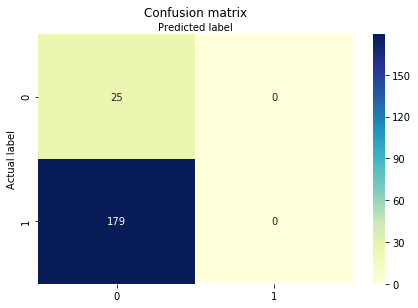

In [462]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [468]:
print("Accuracy:",metrics.accuracy_score(ytest, y_pred))
print("Precision:",metrics.precision_score(ytest, y_pred))
print("Recall:",metrics.recall_score(ytest, y_pred))
print("MR:",(ytest!=y_score).mean())

Accuracy: 0.8676470588235294
Precision: 0.8762376237623762
Recall: 0.9888268156424581
MR: 0.12254901960784313
